## 线性判别式LinearDiscriminantAnalysis

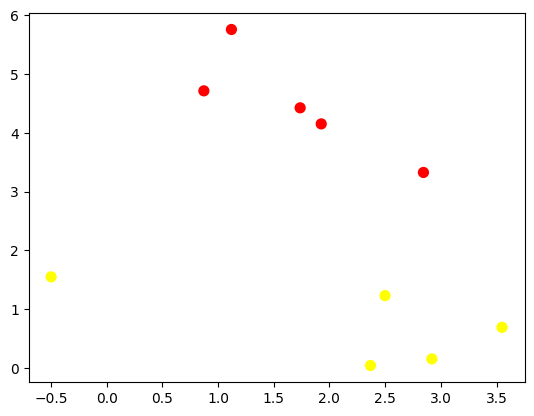

In [111]:
# data generation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=10, centers=2, random_state=0, cluster_std=1.00)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [113]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# 计算数据的均值 / Calculate the mean of the data
mean = np.mean(X, axis=0)
print(f"mean={mean}")

# 通过LDA进行降维 / Perform dimensionality reduction using LDA
lda = LDA(n_components=1)  # 二分类问题，降到一维 / Reduce to 1D for binary classification
X_lda = lda.fit_transform(X, y)

# 获取LDA的方向向量 / Get the direction vector for LDA
lda_coef = lda.coef_[0]  # LDA判别向量 / LDA discriminant vector
lda_direction = lda_coef / np.linalg.norm(lda_coef)  # 标准化方向向量 / Normalize the direction vector
print(f"lda_coef={lda_coef}, lda_direction={lda_direction}")

mean=[1.93396532 2.60510408]
lda_coef=[ -3.83547194 -10.08854514], lda_direction=[-0.35536549 -0.93472743]


In [116]:
# 打印原始数据投影后的值 / Print original data projected values
print("Original Data Projection Values:")
for i in range(len(projection_length)):
    print(f"Data point {X[i]}: Projection value = {projection_length[i]:.4f}, Original class = {y[i]}")

Original Data Projection Values:
Data point [1.12031365 5.75806083]: Projection value = -2.6580, Original class = 0
Data point [-0.49772229  1.55128226]: Projection value = 1.8492, Original class = 1
Data point [1.9263585  4.15243012]: Projection value = -1.4436, Original class = 0
Data point [2.49913075 1.23133799]: Projection value = 1.0833, Original class = 1
Data point [3.54934659 0.6925054 ]: Projection value = 1.2137, Original class = 1
Data point [1.7373078  4.42546234]: Projection value = -1.6317, Original class = 0
Data point [2.91970372 0.15549864]: Projection value = 1.9394, Original class = 1
Data point [2.84382807 3.32650945]: Projection value = -0.9977, Original class = 0
Data point [0.87305123 4.71438583]: Projection value = -1.5946, Original class = 0
Data point [2.36833522 0.04356792]: Projection value = 2.2400, Original class = 1


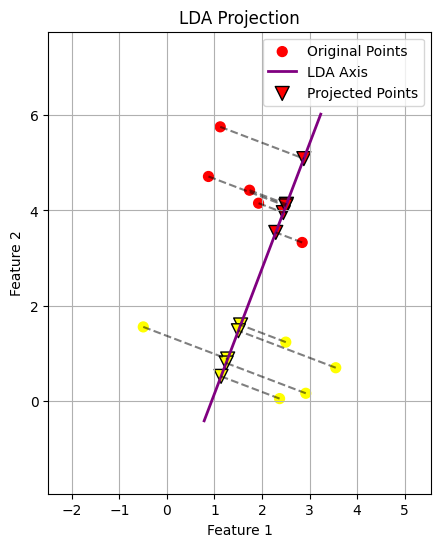

In [117]:
# 计算投影点 / Calculate the projection points
projection_length = np.dot(X - mean, lda_direction)
projection = np.outer(projection_length, lda_direction) + mean

# 创建一个新的图 / Create a new plot
plt.figure(figsize=(6, 6))  # 调整图的尺寸 / Adjust the figure size

# 绘制原始数据点 / Plot original data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', label='Original Points')

# 绘制LDA轴 / Plot the LDA axis
# 为了绘制一条足够长的LDA轴线，选择轴上两个点，从数据最小到最大投影长度扩展一部分长度
# To plot a sufficiently long LDA axis, choose two points from the axis and extend from min to max projection length
min_proj = projection_length.min()
max_proj = projection_length.max()
axis_points = np.array([min_proj - 1, max_proj + 1])  # 扩展1单位 / Extend by 1 unit
axis_coords = np.outer(axis_points, lda_direction) + mean
plt.plot(axis_coords[:, 0], axis_coords[:, 1], color='purple', linewidth=2, label='LDA Axis')

# 绘制投影线 / Plot the projection lines
for i in range(X.shape[0]):
    plt.plot([X[i, 0], projection[i, 0]], [X[i, 1], projection[i, 1]], 'k--', alpha=0.5)

# 绘制投影后的点 / Plot the projected points
plt.scatter(projection[:, 0], projection[:, 1], c=y, s=100, cmap='autumn', edgecolor='k', marker='v', label='Projected Points')

# 调整X轴和Y轴的显示范围，让点更分散 / Adjust the display range of the X and Y axis to make points more spread out
plt.xlim(X[:, 0].min() - 2, X[:, 0].max() + 2)  # X轴范围 / X-axis range
plt.ylim(X[:, 1].min() - 2, X[:, 1].max() + 2)  # Y轴范围 / Y-axis range

# 调整纵横比，让图形在Y方向上拉伸 / Adjust the aspect ratio to stretch the plot vertically
plt.gca().set_aspect(1, adjustable='box')  # 纵横比设置为0.5 / Set aspect ratio to 0.5

# 设置图例和标题 / Set the legend and title
plt.legend()
plt.title("LDA Projection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


New Data Projection Values and Predicted Classes:
New data point [ 1.16748177 -1.08313281]: Projection value = 3.7199, Predicted class = 1
New data point [-0.49772229  1.55128226]: Projection value = 1.8492, Predicted class = 1
New data point [ 4.32502215 -0.55670201]: Projection value = 2.1057, Predicted class = 1
New data point [2.91970372 0.15549864]: Projection value = 1.9394, Predicted class = 1
New data point [2.21021495 1.27582618]: Projection value = 1.1443, Predicted class = 1
New data point [3.58804674 2.36702243]: Projection value = -0.3653, Predicted class = 0
New data point [1.9263585  4.15243012]: Projection value = -1.4436, Predicted class = 0
New data point [1.7373078  4.42546234]: Projection value = -1.6317, Predicted class = 0
New data point [1.42013331 4.63746165]: Projection value = -1.7171, Predicted class = 0
New data point [1.70735537 1.05401263]: Projection value = 1.5304, Predicted class = 1
New data point [2.84382807 3.32650945]: Projection value = -0.9977, P

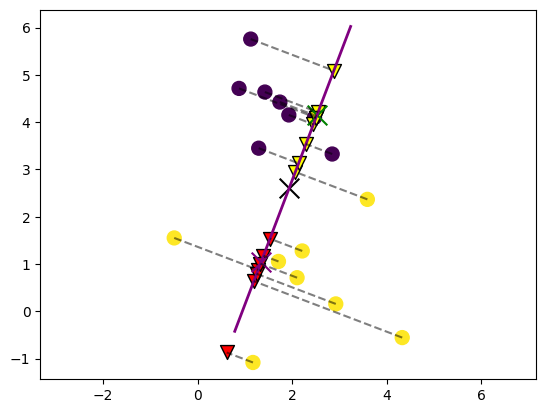

In [124]:
# 生成新的随机数据并投影到LDA轴上 / Generate new random data and project them to the LDA axis
new_data, new_data_y = make_blobs(n_samples=16, centers=2, random_state=0, cluster_std=1.00)
new_projection_length = np.dot(new_data - mean, lda_direction)
new_projection = np.outer(new_projection_length, lda_direction) + mean  # 计算新数据的投影点

# 绘制LDA轴 / Plot the LDA axis
# 为了绘制一条足够长的LDA轴线，选择轴上两个点，从数据最小到最大投影长度扩展一部分长度
# To plot a sufficiently long LDA axis, choose two points from the axis and extend from min to max projection length
min_proj = projection_length.min()
max_proj = projection_length.max()
axis_points = np.array([min_proj - 1, max_proj + 1])  # 扩展1单位 / Extend by 1 unit
axis_coords = np.outer(axis_points, lda_direction) + mean
plt.plot(axis_coords[:, 0], axis_coords[:, 1], color='purple', linewidth=2, label='LDA Axis')


# 打印新数据投影后的值并使用阈值判断类别 / Print new data projected values and classify using the threshold
print("\nNew Data Projection Values and Predicted Classes:")
predicted_classes = []
for i in range(len(new_data)):
    # 使用阈值来判断类别 / Use threshold to classify
    predicted_class = 0 if new_projection_length[i] < threshold else 1
    predicted_classes.append(predicted_class)
    print(f"New data point {new_data[i]}: Projection value = {new_projection_length[i]:.4f}, Predicted class = {predicted_class}")

# 绘制新的随机数据点和它们的投影 / Plot new random points and their projections
plt.scatter(new_data[:, 0], new_data[:, 1], c=new_data_y, s=100, label='New Random Points')

# 根据预测类别绘制投影后的新数据点 / Plot projected new points with predicted class colors
for i in range(len(new_data)):
    plt.plot([new_data[i, 0], new_projection[i, 0]], [new_data[i, 1], new_projection[i, 1]], 'k--', alpha=0.5)
    # 根据预测类别使用不同颜色 / Use different colors for predicted classes
    if predicted_classes[i] == 0:
        plt.scatter(new_projection[i, 0], new_projection[i, 1], color='yellow', s=100, edgecolor='k', marker='v', label='Projected New Points (Class 0)' if i == 0 else "")
    else:
        plt.scatter(new_projection[i, 0], new_projection[i, 1], color='red', s=100, edgecolor='k', marker='v', label='Projected New Points (Class 1)' if i == 0 else "")

# 绘制类别均值和阈值 / Plot class means and threshold
mean_class_0_projection = class_0_mean * lda_direction + mean
mean_class_1_projection = class_1_mean * lda_direction + mean
threshold_projection = threshold * lda_direction + mean

plt.axis('equal')
plt.scatter(mean_class_0_projection[0], mean_class_0_projection[1], color='green', s=200, marker='x', label='Class 0 Mean')
plt.scatter(mean_class_1_projection[0], mean_class_1_projection[1], color='purple', s=200, marker='x', label='Class 1 Mean')
plt.scatter(threshold_projection[0], threshold_projection[1], color='black', s=200, marker='x', label='Threshold')